In [2]:
!mkdir ../checkpoints
# !wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

mkdir: cannot create directory ‘../checkpoints’: File exists


In [8]:
import os
import matplotlib.pyplot as plt
import mmcv
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from PIL import Image

In [4]:
config_file = '../configs/swin/upernet_swin_base_patch4_window7_512x512_160k_ade20k.py'
checkpoint_file = '../checkpoints/upernet_swin_base_patch4_window7_512x512.pth'

In [5]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:1')

In [6]:
scannet_dir = '/root/code/data_ssd/scannetv2_dongmin'
splits = ['training_dataset', 'validation_dataset']

In [9]:
palette = get_palette('ade20k')

for split in splits:
    scan_dir = os.path.join(scannet_dir, split, 'scans')
    scenes = sorted([x for x in os.listdir(scan_dir) if x.startswith('scene')])

    for scene in scenes:
        color_resized_dir = os.path.join(scan_dir, scene, 'color_resized')
        color_resized_pred_dir = os.path.join(scan_dir, scene, 'color_resized_swin-ade20k')
        os.makedirs(color_resized_pred_dir, exist_ok=True)
        colors = sorted([x for x in os.listdir(color_resized_dir) if x.endswith('.jpg')])
        
        for color in colors:
            frameid = color.split('.')[0]
            img = os.path.join(color_resized_dir, color)
            result = inference_segmentor(model, img)
            pred = os.path.join(color_resized_pred_dir, f'{frameid}.png')
            if hasattr(model, 'module'):
                model = model.module
            img = model.show_result(img, result, palette=palette, show=False)
            # import pdb;pdb.set_trace()
            img = mmcv.bgr2rgb(img)
            img = Image.fromarray(img)
            img.save(pred)
            # plt.figure(figsize=(15, 10))
            # plt.imshow(img)
            # plt.savefig(pred)
            # show_result_pyplot(model, img, result, get_palette('ade20k'), fname=pred)

/opt/anaconda3/envs/swin/lib/python3.7/site-packages/mmseg/models/segmentors/base.py:267: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


In [11]:
# test a single image
img = '/root/data/scannetv2_dongmin/training_dataset/scans/scene0000_00/color_resized/230.jpg'
result = inference_segmentor(model, img)

/opt/anaconda3/envs/swin/lib/python3.7/site-packages/mmseg/models/segmentors/base.py:267: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


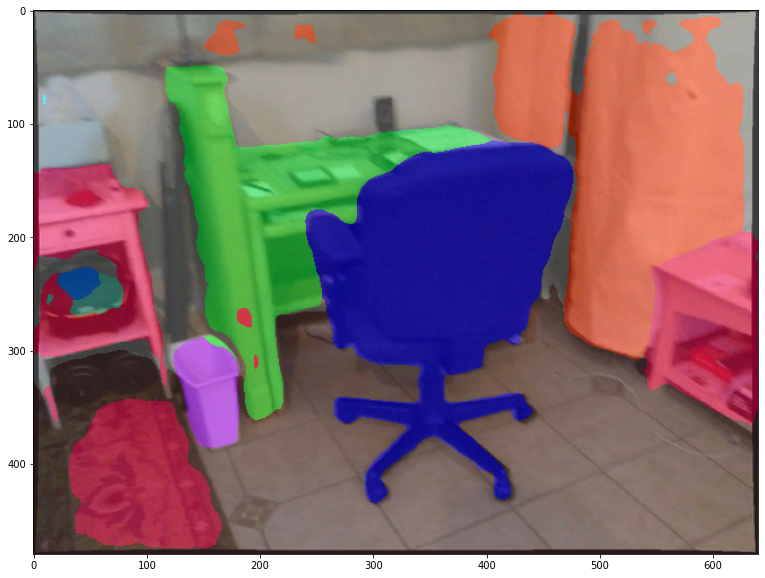

In [12]:
# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))